In [9]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

# excel 파일 불러오기 - read_excel(경로), 제목행 1행부터 읽기
not_exercise = pd.read_excel("./datas/exercise_seoul.xlsx", header=1)
not_exercise

# 칼럼 확인
not_exercise.columns

# '시점' 열 삭제 - drop()
not_exercise.drop(columns='시점', inplace=True)
# print(not_exercise)

# 칼럼 이름 변경(rename()) - 구분별(1) -> 대분류, 구분별(2) -> 분류
not_exercise.rename(columns={'구분별(1)':'대분류', '구분별(2)':'분류'}, inplace=True)
# print(not_exercise)

# 22행 ~ 51행까지 삭제
not_exercise.drop(index=range(22, 52), inplace=True)
print(not_exercise)


      대분류            분류  운동을 할 충분한 시간이 없어서  함께 운동을 할 사람이 없어서  \
0     서울시            소계               46.8               5.0   
1      성별            남자               52.4               4.4   
2     NaN            여자               42.5               5.6   
3     연령별           10대               55.3               4.8   
4     NaN           20대               46.0               4.2   
5     NaN           30대               59.9               5.2   
6     NaN           40대               54.1               3.9   
7     NaN           50대               46.1               6.2   
8     NaN        60대 이상               26.6               6.0   
9     학력별         중졸 이하               24.7               6.2   
10    NaN         고졸 이하               44.3               5.3   
11    NaN         대졸 이하               53.1               4.7   
12    NaN        대학원 이상               61.2               3.0   
13    소득별      100만원 미만               10.7               8.4   
14    NaN  100-200만원 미만               29

In [25]:
not_exercise.loc[2, '대분류'] = '성별'
# print(not_exercise)

# 성별 데이터만 선택
not_exercise[not_exercise['대분류'] == "성별"]

# 원본 유지하고 복사
not_ex_gender = not_exercise[not_exercise['대분류'] == "성별"].copy()
not_ex_gender

# 대분류 칼럼 삭제
# not_ex_gender.drop(columns='대분류', inplace=True)
not_ex_gender = not_ex_gender.drop('대분류', axis=1)
not_ex_gender

# 인덱스를 '분류'로 설정
not_ex_gender.set_index('분류', inplace=True)
not_ex_gender

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
1,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,여자,42.5,5.6,3.9,41.0,5.4,1.7


Text(0, 0.5, '')

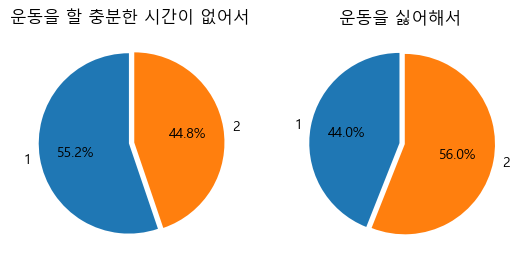

In [43]:
import matplotlib.pyplot as plt
# fig(figure - 그래프를 그릴 공간), ax(axis-그 공간 중에서 내가 사용할 부분)
fig, ax = plt.subplots(1, 2)  # subplots() - 작은 그래프(1행 2열)
explode = [0.01, 0.05]        # 파이 간 간격
plt.rc('font', family='Malgun Gothic')

not_ex_gender['운동을 할 충분한 시간이 없어서'].plot.pie(ax=ax[0],
                autopct='%.1f%%', startangle=90, explode=explode)

ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')
not_ex_gender['함께 운동을 할 사람이 없어서'].plot.pie(ax=ax[1],
                autopct='%.1f%%', startangle=90, explode=explode)

ax[1].set_title('운동을 싫어해서')
ax[1].set_ylabel('')